In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math
from shapely.geometry import Polygon
from tqdm import tqdm

In [8]:
def ret_supp(point, ret_vals):
    
    if point[0] == 0:
        m = 0
    else:
        m = -math.pow(point[1]/point[0],-1)
    #print(m)
    b = point[1] + -m*point[0]
   # print(b)
    #print(f'y = {m}x + {b}')
    x = np.arange(-3,3,.01)
    y = m*x + b
    if ret_vals:
        return m, b
    else:
        return x, y

In [3]:
def ret_int(m1, b1, m2, b2):
    xi = (b1-b2) / (m2-m1)
    yi = m1 * xi + b1

    return xi, yi

In [57]:
n = 175000
error = []
for eps in tqdm(np.arange(0,46)):
    #print(eps)
    U_x = np.random.uniform(-1,1,(1,n))
    U_y = np.random.uniform(-1,1,(1,n))
    U = np.vstack((U_x,U_y))
    thetas = [0.02, 90, 180, 270]
    thetas = [thetas[i] + eps for i in range(4)]
    directions = [[np.cos(np.radians(thetas[i])), np.sin(np.radians(thetas[i]))] for i in range(4)]
    #print(thetas)
    #print(directions)

    colors = np.array([[np.dot(U[:,i], directions[j]) for i in range(n)] for j in range(4)])
    #print(colors.shape)
    scales = [np.dot(U[:,np.argmax(colors[i])], directions[i]) for i in range(4)]
    #print(scales)
    supports = np.array([ret_supp([directions[i][0]*scales[i], directions[i][1]*scales[i]], False) for i in range(4)])
    m_b = np.array([ret_supp([directions[i][0]*scales[i], directions[i][1]*scales[i]], True) for i in range(4)])
    #print(supports.shape)

    points_of_i = []
    for i in range(4):
        if i < 3:
            points_of_i.append(ret_int(m_b[i][0], m_b[i][1], m_b[i+1][0], m_b[i+1][1]))
        else:
            points_of_i.append(ret_int(m_b[i][0], m_b[i][1], m_b[0][0], m_b[0][1]))
    #print(points_of_i)
    pgon = Polygon(points_of_i) # Assuming the OP's x,y coordinates
    error.append(pgon.area)
    
    """
    plt.xlim([-2,2])
    plt.ylim([-2,2])
    plt.scatter(U[0,:], U[1,:], c=colors[0], cmap="RdYlGn", s=40, edgecolors="black");
    #plt.plot([0,directions[0][0]*(scales[0]+2)], [0, directions[0][1]*(scales[0]+2)], "k", linewidth=4)

    for i in range(4):
        plt.plot(supports[i][0], supports[i][1], "k", linewidth=4)
    for i in range(len(points_of_i)):
        plt.plot(points_of_i[i][0],points_of_i[i][1], "rs")
    plt.colorbar()
    plt.show()
    """


100%|██████████| 46/46 [01:30<00:00,  1.97s/it]


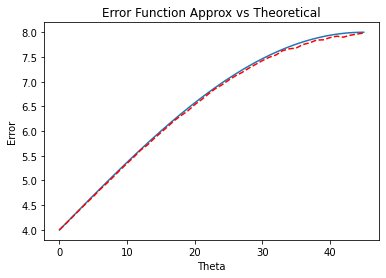

In [69]:
plt.plot([x for x in np.arange(0, 45, .01)], [8*np.sin(np.radians(90+x))*np.sin(np.radians(x))+4 for x in np.arange(0, 45, .01)])
plt.plot([x for x in np.arange(0, 46, 1)], error, 'r--')
plt.xlabel("Theta")
plt.ylabel("Error")
plt.title("Error Function Approx vs Theoretical")
plt.savefig("ErrorApprox.png")

KeyboardInterrupt: 

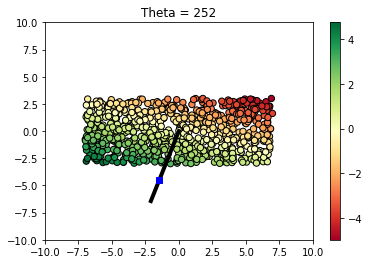

In [52]:
n = 800
U_x = np.random.uniform(-7,7,(1,n))
U_y = np.random.uniform(-3,3,(1,n))
U = np.vstack((U_x,U_y))
for theta in range(0, 361):
    direction = np.array([np.cos(np.radians(theta)), np.sin(np.radians(theta))])
    colors = [np.dot(U[:,i], direction) for i in range(n)]
    scale = np.dot(U[:,np.argmax(colors)], direction)
    plt.title(f"Theta = {theta}")
    plt.xlim([-10,10])
    plt.ylim([-10,10])
    plt.scatter(U[0,:], U[1,:], c=colors, cmap="RdYlGn", s=40, edgecolors="black");
    plt.plot([0,direction[0]*(scale+2)], [0, direction[1]*(scale+2)], "k", linewidth=4)
    plt.plot(direction[0]*scale, direction[1]*scale, "bs")
    plt.colorbar()
    plt.savefig(f"images/theta_{theta}")
    plt.clf()
    

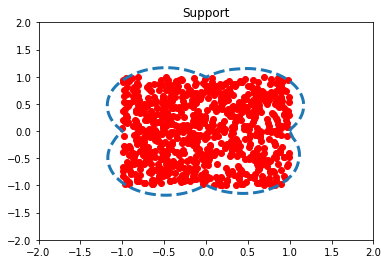

In [19]:
n = 800
U_x = np.random.uniform(-1,1,(1,n))
U_y = np.random.uniform(-1,1,(1,n))
U = np.vstack((U_x,U_y))
support_x = []
support_y = []
for theta in range(0, 361):
    direction = np.array([np.cos(np.radians(theta)), np.sin(np.radians(theta))])
    colors = [np.dot(U[:,i], direction) for i in range(n)]
    scale = np.dot(U[:,np.argmax(colors)], direction)
    support_x.append(direction[0]*scale)
    support_y.append(direction[1]*scale)
support = np.vstack((support_x, support_y))
plt.title(f"Support")
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.scatter(U[0,:], U[1,:], c="red");
plt.plot(support[0,:], support[1,:], "--", linewidth=3)
plt.show()

In [9]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.linalg as la

In [10]:
def support(X, val, q): # Set q to be the qth quantile
    return np.quantile((X.T).dot(val), q)

def compute_fb(X, q, n):
    polar_body = np.ones((n,0))
    for i in range(X.shape[1]):
        if support(X, X[:,i] / la.norm(X[:,i]), q) > np.dot(X[:,i], X[:,i]/la.norm(X[:,i])): 
            polar_body = np.hstack((polar_body, np.array(X[:,i]).reshape(n,1)))
    return polar_body

In [17]:
pi0 = folder['pi0']
mu0 = folder['mu0']
sigma0 = folder['sigma0']

print(f'Check the shape of pi0 = ({pi0.shape}), mu0 = ({mu0.shape}), sigma0 = ({sigma0.shape})')
print(f'pi0: \n{pi0} \n mu0: \n{mu0}\n sigma0: \n{sigma0}')

Check the shape of pi0 = ((3,)), mu0 = ((3, 2)), sigma0 = ((3, 2, 2))
pi0: 
[0.3451814  0.6066179  0.04820071] 
 mu0: 
[[-0.71336192  0.90635089]
 [ 0.76623673  0.82605407]
 [-1.32368279 -1.75244452]]
 sigma0: 
[[[ 1.00490413  1.89980228]
  [ 1.89980228  4.18354574]]

 [[ 1.96867815  0.78415336]
  [ 0.78415336  1.83319942]]

 [[ 0.19316335 -0.11648642]
  [-0.11648642  1.98395967]]]


In [12]:
from scipy.stats import multivariate_normal

def E_step(data, pi, mu, sigma):
    N = data.shape[0]
    K = pi.shape[0]
    d = mu.shape[0]
    gamma = np.zeros((N,K))
    for nk in range(K):
        gamma[:, nk] = pi[nk] * multivariate_normal.pdf(data, mean=mu[nk], cov=sigma[nk])
    gamma = gamma/np.sum(gamma, axis=1, keepdims=True)
    
    return gamma

In [13]:
def M_step(data, gamma):
    N, D = data.shape
    K = gamma.shape[1]
    pi = np.zeros(K)
    mu = np.zeros((K,D))
    sigma = np.zeros((K, D, D))
    
    for ik in range(K):
        n_k = gamma[:, ik].sum()
        pi[ik] = n_k/N
        elements = np.reshape(gamma[:, ik], (gamma.shape[0], 1))
        mu[ik, :] = (np.multiply(elements, data)).sum(axis=0) / n_k
        sigma_sum = 0
        for i in range(N):
            var = data[i] - mu[ik]
            sigma_sum = sigma_sum + gamma[i, ik] * np.outer(var, var)
        sigma[ik, :] = sigma_sum/n_k
    return pi, mu, sigma

In [14]:
def elbo(data, gamma, pi, mu, sigma):
    N = data.shape[0]
    K = gamma.shape[1]
    d = data.shape[1]
    
    loss = 0
    for i in range(N):
        x = data[i]
        for k in range(K):
            pos_dist = gamma[i, k]
            log_lik = np.log(multivariate_normal.pdf(x, mean=mu[k, :], cov=sigma[k, :, :] + 1e-20))
            log_q = np.log(gamma[i, k] + 1e-20)
            log_pz = np.log(pi[k] + 1e-20)
            loss = (loss + np.multiply(pos_dist, log_pz) + np.multiply(pos_dist, log_lik) + np.multiply(pos_dist, -log_q))
    return loss

In [15]:
def train_loop(data, K, tolerance=1e-9, max_iter=50,restart=10):
    N, d = data.shape
    elbo_best = -np.inf
    pi_best = None
    mu_best = None
    sigma_best = None
    gamma_f = None
    for _ in range(restart):
        pi = np.ones(K) / K
        mu = np.random.rand(K, d)
        sigma = np.tile(np.eye(d), (K, 1, 1))
        last_iter_loss = None
        all_losses = []
        try: 
            
            for i in range(max_iter):
                gamma = E_step(data, pi, mu, sigma)
                pi, mu, sigma = M_step(data, gamma)
                loss = elbo(data, gamma, pi, mu, sigma)
                if loss > elbo_best:
                    elbo_best = loss
                    pi_best = pi
                    mu_best = mu
                    sigma_best = sigma
                    gamma_f = gamma
                if last_iter_loss and abs((loss - last_iter_loss)/last_iter_loss) < tolerance:
                    break
                last_iter_loss = loss
                all_losses.append(loss)
        except np.linalg.LinAlgError:
            pass
    return elbo_best, pi_best, mu_best, sigma_best, all_losses, gamma_f

In [83]:
best_loss, pi_best, mu_best, sigma_best, ls_lst, final_posterior = train_loop(data, 3)

In [84]:
print ("starting loss, best_loss: ", ls_lst[0], ',',  best_loss)
print ("best pi", pi_best) 
print ("best mu: ", mu_best)

print ("best sigma: ", sigma_best)

starting loss, best_loss:  -1210.7762035426958 , -1063.8112565703846
best pi [0.55082342 0.10730976 0.34186682]
best mu:  [[1.22309493 5.83019484]
 [6.29623091 4.43088254]
 [0.92114773 0.96659099]]
best sigma:  [[[ 0.9435235   0.0673393 ]
  [ 0.0673393   1.10641904]]

 [[ 1.70899045  1.39173436]
  [ 1.39173436  1.32294102]]

 [[ 1.49892434 -0.37295443]
  [-0.37295443  1.42888142]]]


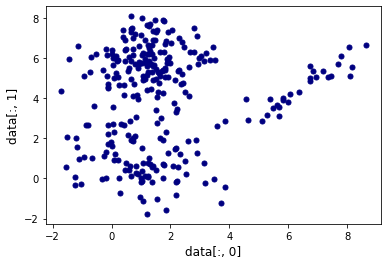

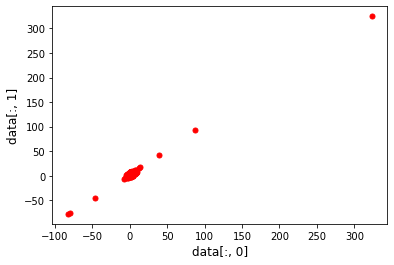

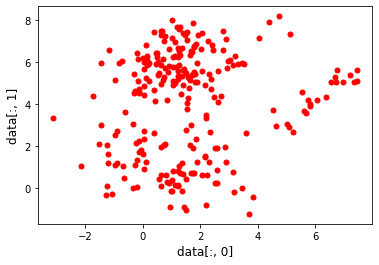

In [21]:
folder = np.load("samples.npz")
data = folder['data']
fig = plt.figure(figsize=(6,4))
plt.plot(data[:, 0], data[:, 1], linestyle='None', marker='o', markersize=5, color='navy')
plt.xlabel('data[:, 0]', fontsize=12)
plt.ylabel('data[:, 1]', fontsize=12)
plt.show()

noisy = data.copy()
for i in range(100):
    scale = np.random.standard_cauchy()
    random_point = np.random.randint(0, data.shape[0])
    noisy[random_point, 0] += scale
    noisy[random_point, 1] += scale
plt.plot(noisy[:, 0], noisy[:, 1], linestyle='None', marker='o', markersize=5, color='red')
plt.xlabel('data[:, 0]', fontsize=12)
plt.ylabel('data[:, 1]', fontsize=12)
plt.show()

data_fb = compute_fb((noisy - np.mean(0)).T, .95, 2)
plt.plot(data_fb[0, :], data_fb[1, :], linestyle='None', marker='o', markersize=5, color='red')
plt.xlabel('data[:, 0]', fontsize=12)
plt.ylabel('data[:, 1]', fontsize=12)
plt.show()

In [22]:
def plot_contours(data, means, covs):
    """visualize the gaussian components over the data"""
    plt.figure()
    plt.plot(data[:, 0], data[:, 1], 'ko')

    delta = 0.025
    k = means.shape[0]
    x = np.arange(-2.5, 10.0, delta)
    y = np.arange(-2.5, 10.0, delta)
    x_grid, y_grid = np.meshgrid(x, y)
    coordinates = np.array([x_grid.ravel(), y_grid.ravel()]).T

    col = ['green', 'red', 'indigo']
    for i in range(k):
        mean = means[i]
        cov = covs[i]
        z_grid = multivariate_normal(mean, cov).pdf(coordinates).reshape(x_grid.shape)
        plt.contour(x_grid, y_grid, z_grid, colors = col[i])
    plt.tight_layout()

<Figure size 1008x864 with 0 Axes>

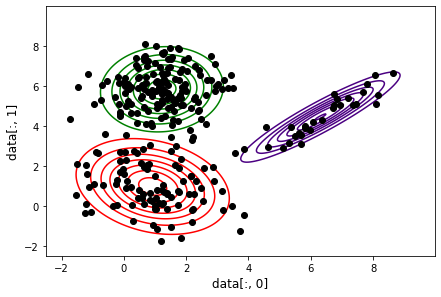

Original Mean: [[1.2215991  5.82962808]
 [0.92634336 0.96642033]
 [6.30978007 4.44084974]]
Original Cov: [[[ 0.94608142  0.07022242]
  [ 0.07022242  1.10721448]]

 [[ 1.50152004 -0.36222654]
  [-0.36222654  1.42453523]]

 [[ 1.67147566  1.36418616]
  [ 1.36418616  1.3030044 ]]]


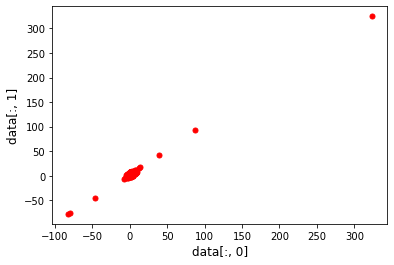

<Figure size 1008x864 with 0 Axes>

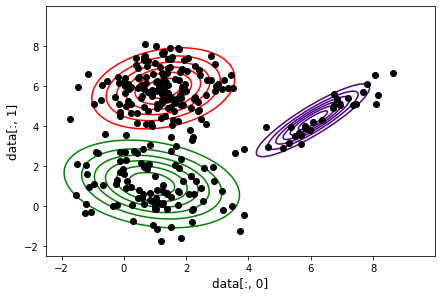

New Mean: [[0.89728505 1.09465557]
 [1.26530946 5.87798873]
 [6.07018605 4.27911547]]
New Cov: [[[ 2.06073035 -0.40670852]
  [-0.40670852  1.24947197]]

 [[ 1.380671    0.30043741]
  [ 0.30043741  1.07791209]]

 [[ 0.85976807  0.76812396]
  [ 0.76812396  0.86205344]]]


In [23]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, n_init=10)
gmm.fit(data)
fig= plt.figure(figsize=(14, 12))
plot_contours(data, gmm.means_, gmm.covariances_)
plt.xlabel("data[:, 0]", fontsize=12)
plt.ylabel("data[:, 1]", fontsize=12)
plt.show()
print(f"Original Mean: {gmm.means_}")
print(f"Original Cov: {gmm.covariances_}")

plt.plot(noisy[:, 0], noisy[:, 1], linestyle='None', marker='o', markersize=5, color='red')
plt.xlabel('data[:, 0]', fontsize=12)
plt.ylabel('data[:, 1]', fontsize=12)
plt.show()

gmm.fit(data_fb.T)
fig= plt.figure(figsize=(14, 12))
plot_contours(data, gmm.means_, gmm.covariances_)
plt.xlabel("data[:, 0]", fontsize=12)
plt.ylabel("data[:, 1]", fontsize=12)
plt.show()
print(f"New Mean: {gmm.means_}")
print(f"New Cov: {gmm.covariances_}")